# Hello Miwaka Flaka Flame

Try turning the plot at the end of the notebook into a D3 plot. See if you can add tooltips labeled with the name of the salt, panning & zooming. Start there. We will add more funcionality later

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LINA
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
%matplotlib inline

plt.rc("figure", facecolor="white")

params = {
    'lines.markersize' : 10,
    'axes.labelsize': 20,
    'font.size': 20,
    'legend.fontsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': False,
   }
plt.rcParams.update(params)
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]   

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)   


# Scikit Learn

In [3]:
#load numpy data and Descripor list
data = np.loadtxt('../salty/data/salts_with_descriptors')
f = open('../salty/data/Deslist','r')
deslist = []
for line in f:
    deslist.append("Cation %s " % line.strip('\n\t'))
f = open('../salty/data/Deslist','r')
for line in f:
    deslist.append("Anion %s " % line.strip('\n\t'))
deslist.append("Temperature")
deslist.append("Pressure")
deslist.append("Density")

data = data[~np.isnan(data).any(axis=1)]

n = data.shape[0]
d = data.shape[1]
d -= 1
print(n,d)
print(len(deslist))

(3659, 190)
191


In [4]:
n_train = int(n*0.8)
n_test  = n - n_train
data = np.random.permutation(data)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))

X_train[:] = data[:n_train,:-1]
Y_train[:] = np.log(data[:n_train,-1])

X_test[:] = data[n_train:,:-1]
Y_test[:] = np.log(data[n_train:,-1])

print(X_train.shape)
print(X_test.shape)

(2927, 190)
(732, 190)


In [5]:
model = Lasso(alpha=1e-2,tol=1e-10, max_iter=4000)
model.fit(X_train,Y_train)

/Users/wesleybeckner/anaconda/envs/my-rdkit-env/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=4000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=1e-10, warm_start=False)

In [6]:
i=0
for a in range(len(deslist)-1):
    if model.coef_[a] != 0:
        print(a, deslist[a])
        i+=1
print(i)

(97, 'Anion BertzCT ')
(98, 'Anion Ipc ')
(102, 'Anion Kappa3 ')
(117, 'Anion MolWt ')
(128, 'Anion TPSA ')
(158, 'Anion SlogP_VSA5 ')
(184, 'Anion VSA_EState8 ')
(185, 'Anion VSA_EState9 ')
(188, 'Temperature')
(189, 'Pressure')
10


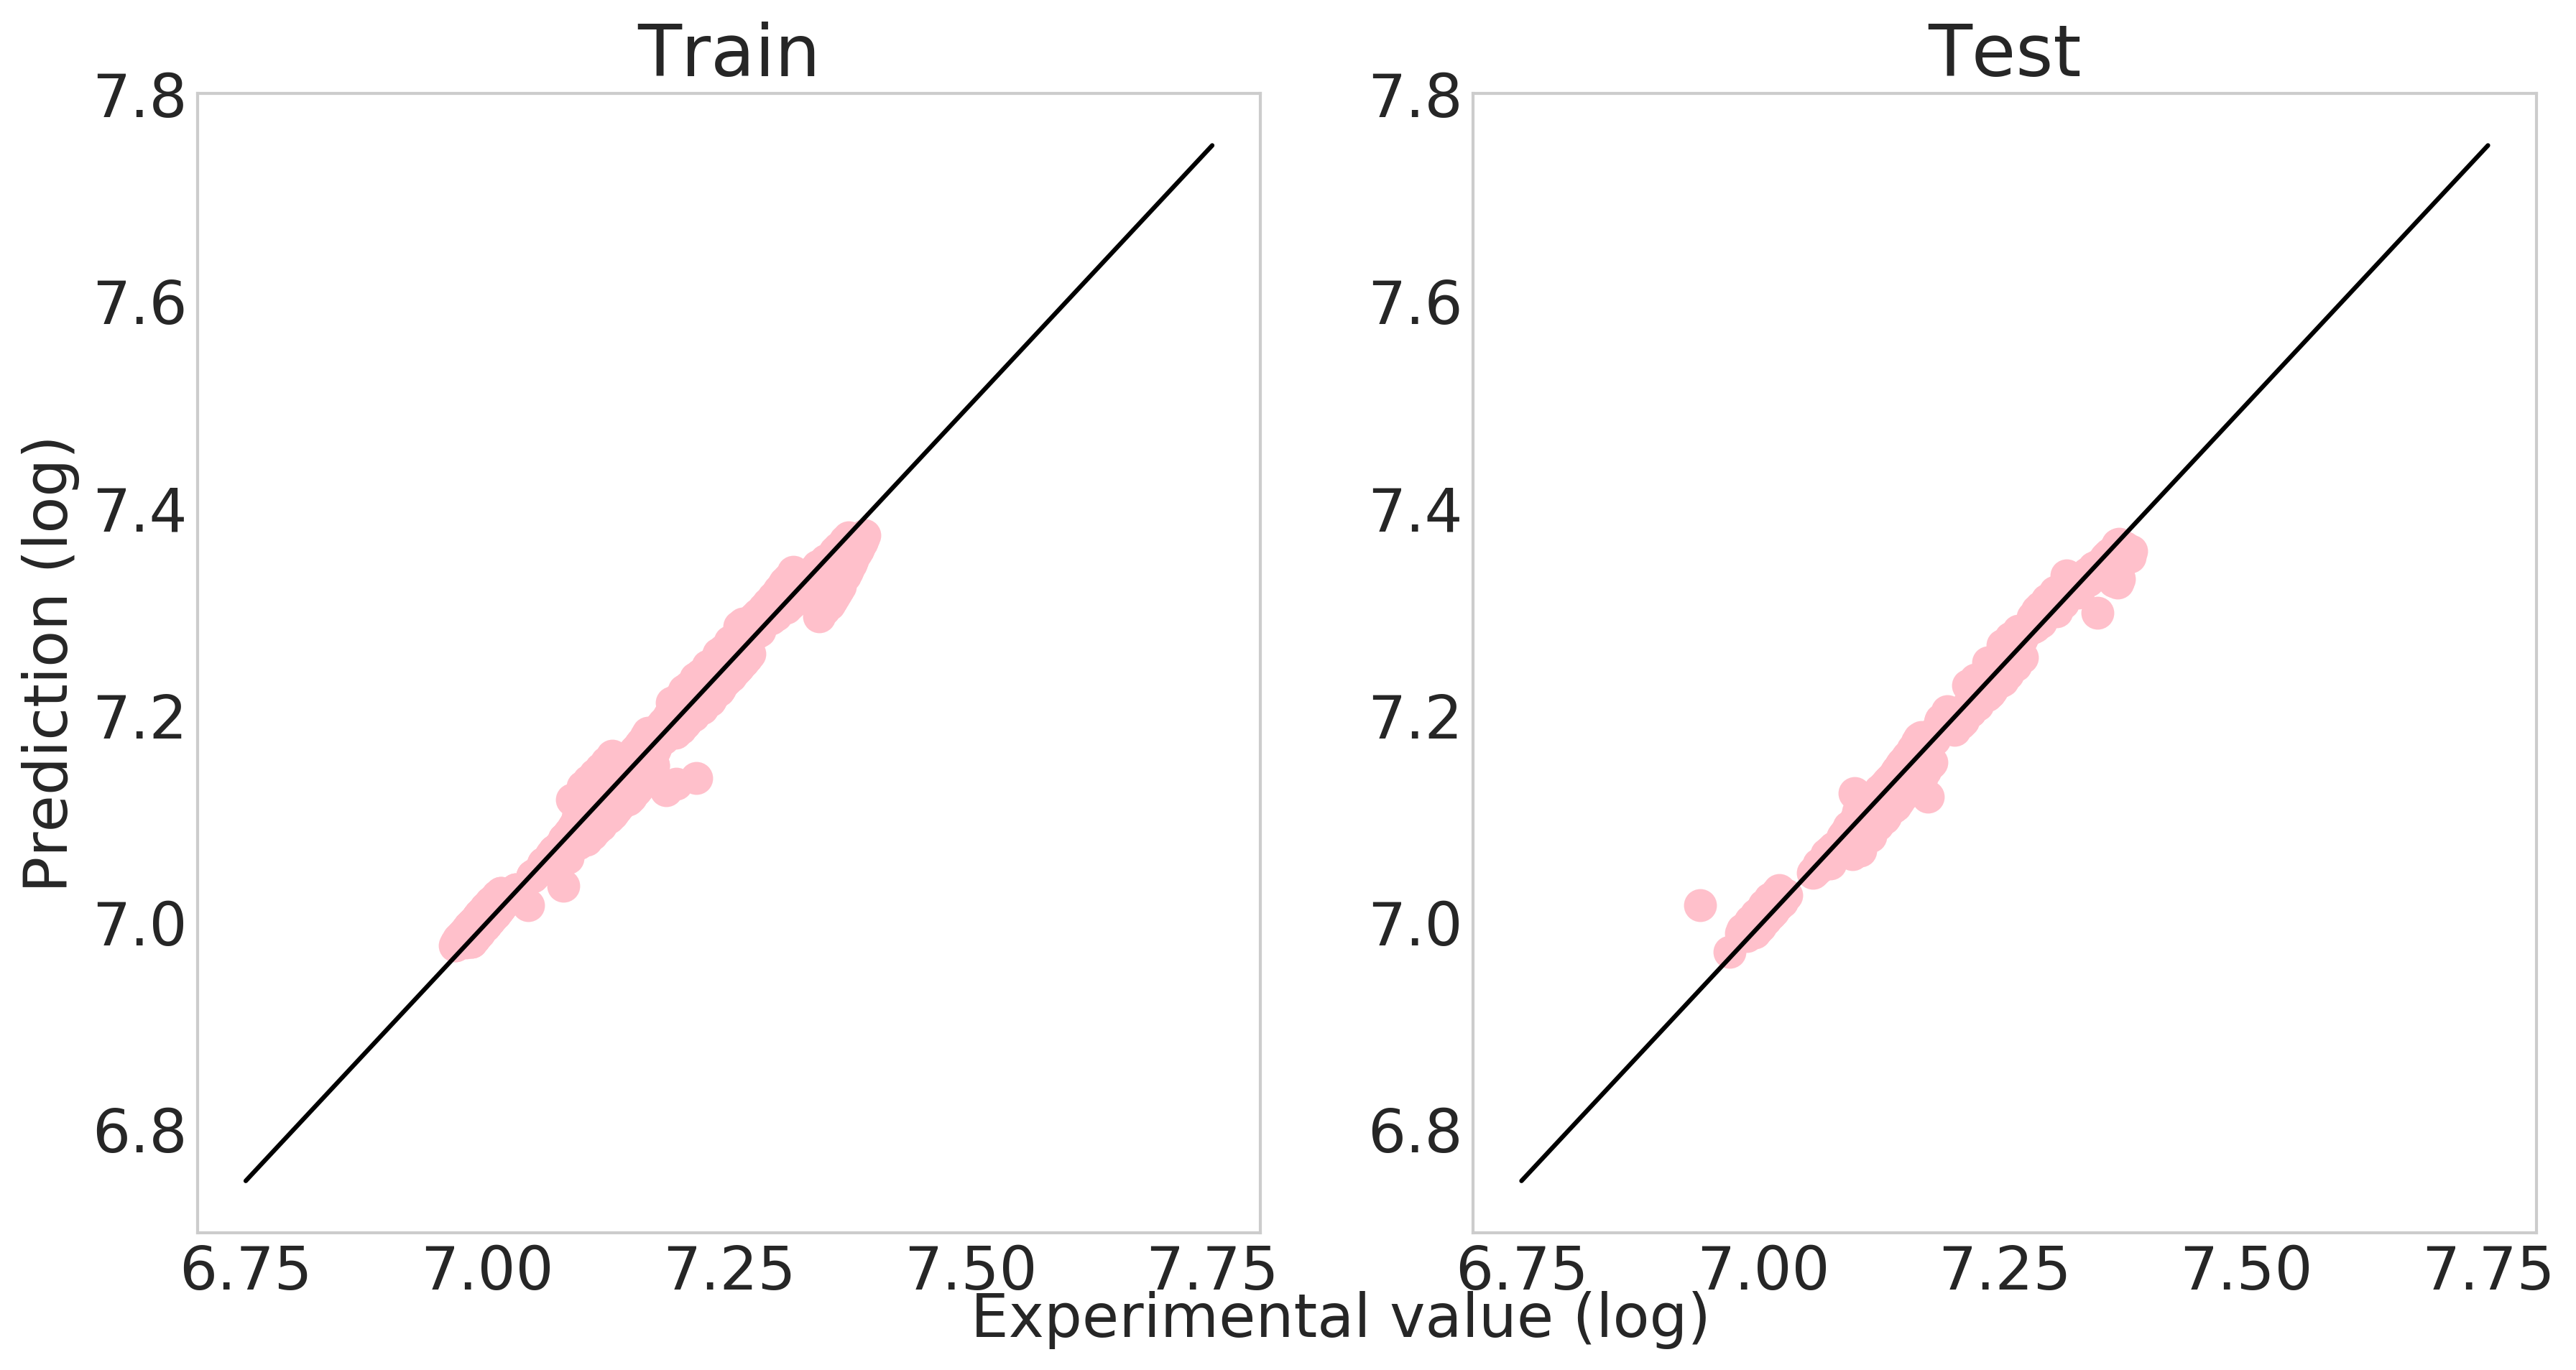

In [7]:
with plt.style.context('seaborn-whitegrid'):
    fig=plt.figure(figsize=(14,7), dpi=300)
    ax = fig.add_subplot(121)
    ax.plot(Y_train,model.predict(X_train),"o",color = "pink")
    ax.plot(np.arange(6.75,7.75,0.0001),np.arange(6.75,7.75,0.0001),color = 'black')
#     ax.axis([-6,1,-6,1])
#     plt.xlim(-6,-1)
#     plt.ylim(-6,-1)
    plt.text(7.5,6.6,'Experimental value (log)')
    plt.ylabel('Prediction (log)')
    plt.title('Train')
    plt.grid(False)
    ax2 = fig.add_subplot(122)
    ax2.plot(Y_test,model.predict(X_test),"o",color = "pink")
    ax2.plot(np.arange(6.75,7.75,0.0001),np.arange(6.75,7.75,0.0001),color = 'black')
#     ax2.axis([-6,1,-6,1])
#     plt.xlim(-6,-1)
#     plt.ylim(-6,-1)
    plt.title('Test')
    plt.grid(False)